In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

In [60]:
players=pd.read_csv("Players.csv")
history=pd.read_csv("Historical NBA Performance.csv")
allStar=pd.read_csv("NBA All Star Games.csv")
shots=pd.read_csv("NBA_Shots_2000_to_2018.csv")
player_data=pd.read_csv("player_data.csv")
season=pd.read_csv("Seasons_Stats.csv")


E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
shots=shots.drop(['Unnamed: 0', "X"], axis=1)

In [62]:
shots.columns =["ID", "Player", "Season","Top.px", "Left.px", "Date", "Team", "Opponent", "Location", "Quarter", "Game_Clock",
               "Outcome", "Shot_Value", "Shot_distance", "team_score", "opp_score"]

In [63]:
shots.head()

,ID,Player,Season,Top.px,Left.px,Date,Team,Opponent,Location,Quarter,Game_Clock,Outcome,Shot_Value,Shot_distance,team_score,opp_score
0,abdulma02,Mahmoud Abdul-Rauf,2001,250,304.0,110600.0,VAN,ATL,HOME,3,00:38.4,0.0,2.0,21.0,69.0,55.0
1,abdulma02,Mahmoud Abdul-Rauf,2001,147,241.0,111800.0,VAN,DAL,HOME,2,9:22,1.0,2.0,10.0,33.0,26.0
2,abdulma02,Mahmoud Abdul-Rauf,2001,132,403.0,112400.0,VAN,DET,AWAY,3,6:42,0.0,2.0,18.0,60.0,78.0
3,abdulma02,Mahmoud Abdul-Rauf,2001,177,129.0,112400.0,VAN,DET,AWAY,3,2:42,0.0,2.0,17.0,66.0,80.0
4,abdulma02,Mahmoud Abdul-Rauf,2001,99,390.0,112400.0,VAN,DET,AWAY,3,2:18,0.0,2.0,16.0,66.0,80.0


In [64]:
shots.dtypes

ID                object
Player            object
Season             int64
Top.px            object
Left.px          float64
Date             float64
Team              object
Opponent          object
Location          object
Quarter           object
Game_Clock        object
Outcome          float64
Shot_Value       float64
Shot_distance    float64
team_score       float64
opp_score        float64
dtype: object

In [65]:
shots=shots[shots["Top.px"]!='     >']

In [66]:
shots["Top.px"]=pd.to_numeric(shots["Top.px"])

In [76]:
shots2=shots[shots["Shot_Value"]==2.0]
shots3=shots[shots["Shot_Value"]==3.0]

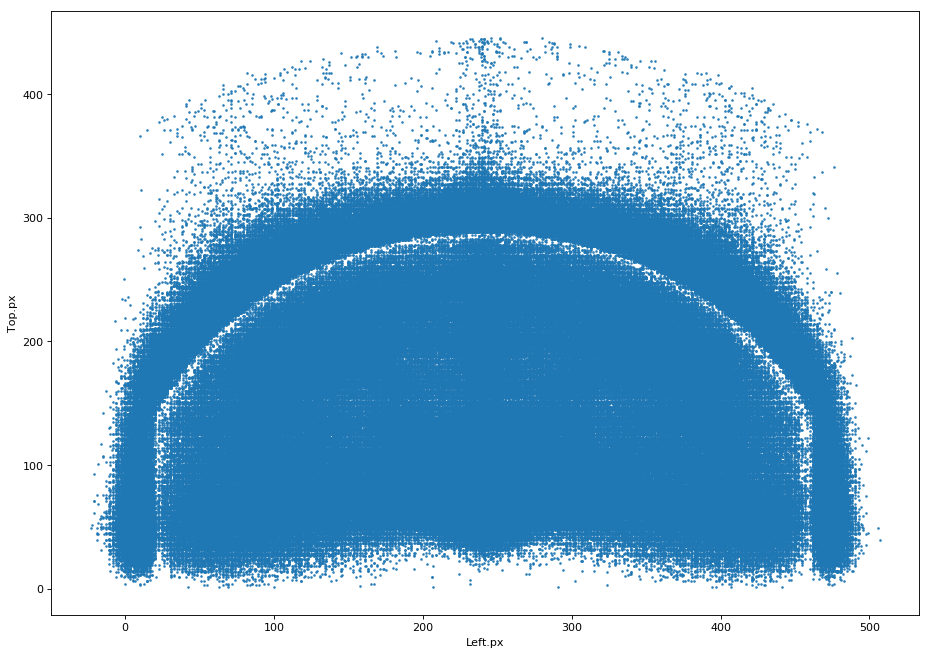

In [78]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
sns.regplot(shots["Left.px"], shots["Top.px"], fit_reg=False,scatter_kws={'s':2})

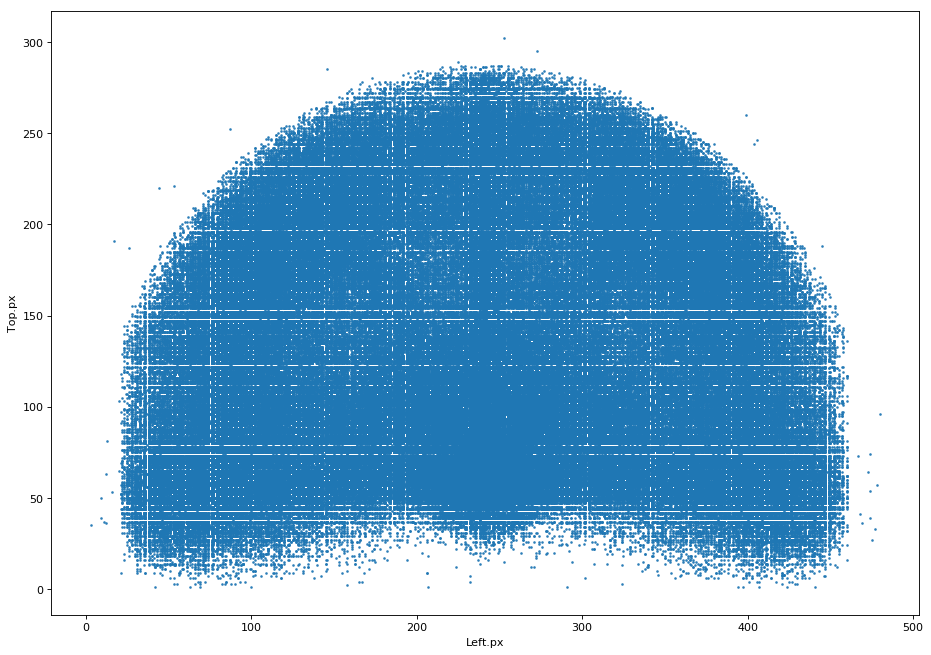

In [77]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
sns.regplot(shots2["Left.px"], shots2["Top.px"], fit_reg=False,scatter_kws={'s':2})

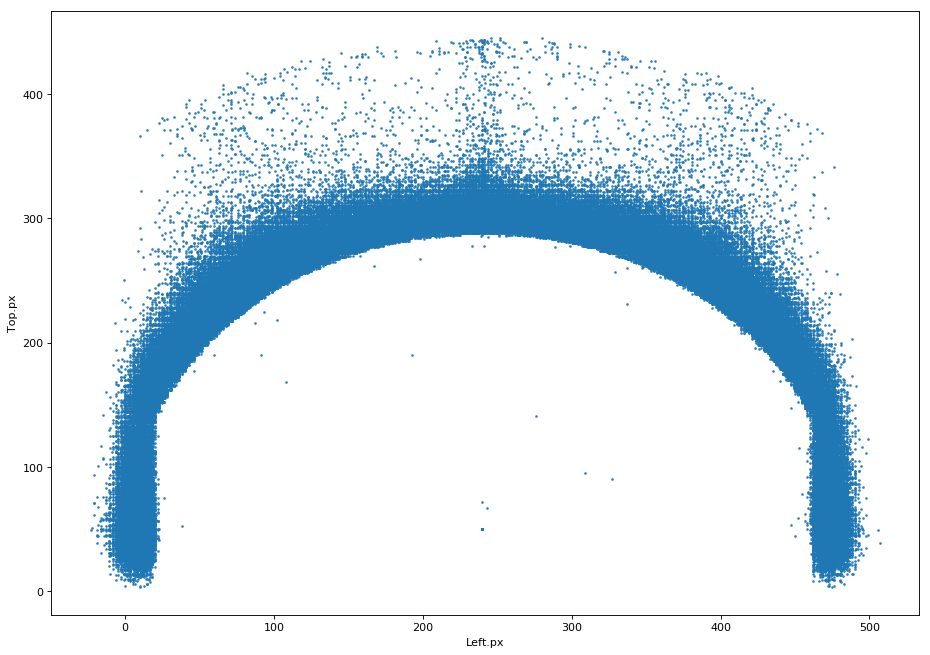

In [79]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
sns.regplot(shots3["Left.px"], shots3["Top.px"], fit_reg=False,scatter_kws={'s':2})

In [84]:
shots16=shots[shots.Season==2016]

In [94]:
shots16.head()

,ID,Player,Season,Top.px,Left.px,Date,Team,Opponent,Location,Quarter,Game_Clock,Outcome,Shot_Value,Shot_distance,team_score,opp_score
8717,acyqu01,Quincy Acy,2016,106,218.0,110715.0,SAC,GSW,HOME,1,5:33,1.0,2.0,6.0,9.0,6.0
8718,acyqu01,Quincy Acy,2016,248,390.0,110915.0,SAC,SAS,HOME,4,1:00,1.0,3.0,24.0,88.0,104.0
8719,acyqu01,Quincy Acy,2016,66,200.0,111315.0,SAC,BRK,HOME,3,1:53,0.0,2.0,4.0,81.0,80.0
8720,acyqu01,Quincy Acy,2016,51,240.0,111315.0,SAC,BRK,HOME,3,0:19,1.0,2.0,0.0,85.0,82.0
8721,acyqu01,Quincy Acy,2016,52,301.0,111515.0,SAC,TOR,HOME,3,11:32,1.0,2.0,6.0,55.0,51.0


In [203]:
gswShots16=shots16[shots16.Opponent=="GSW"]

In [204]:
XGSW = np.array(list(zip(gswShots16["Left.px"], gswShots16["Top.px"])))

In [205]:
kmeansGSW= KMeans(n_clusters=10)
kmeansGSW = kmeansGSW.fit(XGSW)
labelsGSW= kmeansGSW.predict(XGSW)
# Centroid values
centroidsGSW = kmeansGSW.cluster_centers_

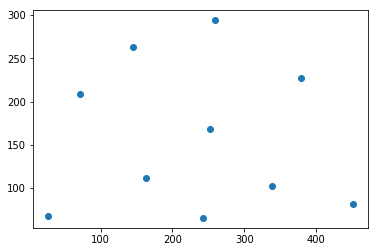

In [206]:
plt.scatter(centroidsGSW[:,0],centroidsGSW[:,1], label='True Position')  

In [207]:
centroidsGSW

array([[241.97745209,  65.56369786],
       [258.91772152, 293.88607595],
       [339.0952381 , 101.96428571],
       [162.59375   , 111.39583333],
       [450.9       ,  82.        ],
       [378.38095238, 227.31135531],
       [ 27.38297872,  67.78723404],
       [251.812     , 168.68      ],
       [ 71.60638298, 208.13297872],
       [145.28654971, 263.34502924]])

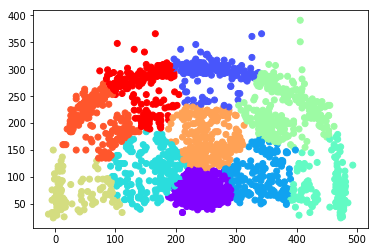

In [208]:
plt.scatter(XGSW[:,0],XGSW[:,1], c=kmeansGSW.labels_, cmap='rainbow')  

In [102]:
madeShots16=shots16[shots16.Outcome==1.0]

In [128]:
missKings16=shots16[shots16.Outcome==0.0]

In [129]:
missKings16=missKings16[missKings16.Team=="SAC"]

In [106]:
madeKings16=madeShots16[madeShots16.Team=="SAC"]

In [160]:
X1=np.array(list(zip(shots16["Left.px"], shots16["Top.px"])))

In [167]:
kmeans1= KMeans(n_clusters=10)
kmeans1 = kmeans1.fit(X1)
labels1= kmeans1.predict(X1)
# Centroid values
centroids1 = kmeans1.cluster_centers_

In [218]:
centroids1

array([[331.08432727, 265.89935133],
       [133.21098726,  96.44294055],
       [455.62170414,  68.76269775],
       [239.96430592,  61.51538763],
       [ 87.53810045, 227.45673604],
       [ 18.73734429,  69.8245428 ],
       [401.64295789, 204.25186379],
       [336.65105909,  90.18143813],
       [208.52208133, 281.31241801],
       [242.27270502, 165.59265606]])

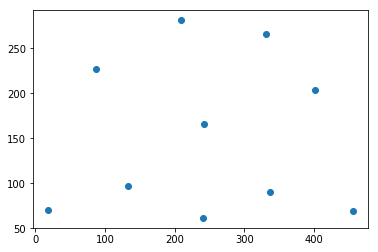

In [168]:
plt.scatter(centroids1[:,0],centroids1[:,1], label='True Position')  

In [190]:
centroids1

array([[331.08432727, 265.89935133],
       [133.21098726,  96.44294055],
       [455.62170414,  68.76269775],
       [239.96430592,  61.51538763],
       [ 87.53810045, 227.45673604],
       [ 18.73734429,  69.8245428 ],
       [401.64295789, 204.25186379],
       [336.65105909,  90.18143813],
       [208.52208133, 281.31241801],
       [242.27270502, 165.59265606]])

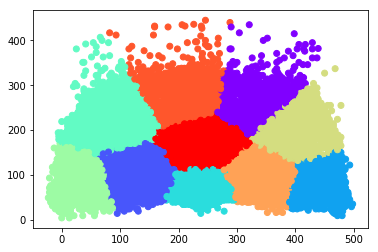

In [169]:
plt.scatter(X1[:,0],X1[:,1], c=kmeans1.labels_, cmap='rainbow')  

In [209]:
gswShots16["label"]=labelsGSW

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [210]:
fGSW=gswShots16.groupby("label")["Outcome"].sum()/(gswShots16[gswShots16.Outcome==0.0].groupby("label")["Outcome"].count()+gswShots16[gswShots16.Outcome==1.0].groupby("label")["Outcome"].count())

In [ ]:
fGSW[1]=fGSW[1]*1.5


In [216]:
fGSW[6]=fGSW[6]*1.5
fGSW[8]=fGSW[8]*1.5
fGSW[9]=fGSW[9]*1.5
fGSW[5]=fGSW[5]*1.5
fGSW[4]=fGSW[4]*1.5

In [217]:
fGSW.sort_values(ascending=False)

label
8    0.598404
0    0.554679
6    0.553191
5    0.527473
9    0.517544
4    0.514286
1    0.493671
2    0.476190
3    0.406250
7    0.392000
Name: Outcome, dtype: float64

In [171]:
len(labels1)

62497

In [177]:
df=pd.DataFrame(X1)

In [178]:
df["label"]=labels1

In [182]:
shots16["label"]=labels1

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [184]:
shots16.groupby("label")["Outcome"].sum()

label
0     1726.0
1     1522.0
2     1392.0
3    13123.0
4     2373.0
5     1492.0
6     1837.0
7     1436.0
8     1659.0
9     1716.0
Name: Outcome, dtype: float64

In [187]:
shots16[shots16.Outcome==0.0].groupby("label")["Outcome"].count()

label
0    3050
1    2247
2    2211
3    9855
4    4017
5    2273
6    3130
7    2152
8    2913
9    2373
Name: Outcome, dtype: int64

In [191]:
fgZones=shots16.groupby("label")["Outcome"].sum()/(shots16[shots16.Outcome==0.0].groupby("label")["Outcome"].count()+shots16[shots16.Outcome==1.0].groupby("label")["Outcome"].count())

In [197]:
fgZones[0]=fgZones[0]*1.5
fgZones[2]=fgZones[2]*1.5
fgZones[4]=fgZones[4]*1.5
fgZones[5]=fgZones[5]*1.5
fgZones[6]=fgZones[6]*1.5
fgZones[8]=fgZones[8]*1.5

In [202]:
fgZones.sort_values(ascending=False)

label
5    0.594422
2    0.579517
3    0.571111
4    0.557042
6    0.554761
8    0.544291
0    0.542085
9    0.419663
1    0.403821
7    0.400223
Name: Outcome, dtype: float64

In [131]:
X=np.array(list(zip(madeKings16["Left.px"], madeKings16["Top.px"])))
X2=np.array(list(zip(missKings16["Left.px"], missKings16["Top.px"])))

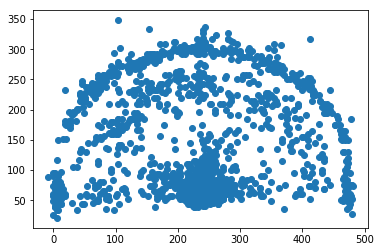

In [108]:
plt.scatter(X[:,0],X[:,1], label='True Position')  

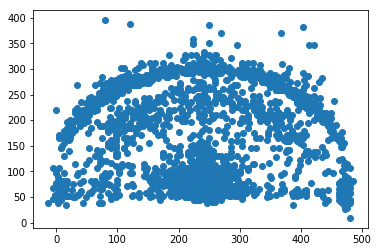

In [132]:
plt.scatter(X2[:,0],X2[:,1], label='True Position')  


In [155]:
kmeans = KMeans(n_clusters=20)
kmeans2=KMeans(n_clusters=20)
# Fitting the input data
kmeans = kmeans.fit(X)
kmeans2=kmeans2.fit(X2)
# Getting the cluster labels
labels = kmeans.predict(X)
labels2= kmeans2.predict(X2)
# Centroid values
centroids = kmeans.cluster_centers_
centroids2=kmeans.cluster_centers_

In [148]:
print(labels[1:20])

[ 4  8  1 13  3  8  8  8  8  1  8  0  8  8  3  1  8  8  8]


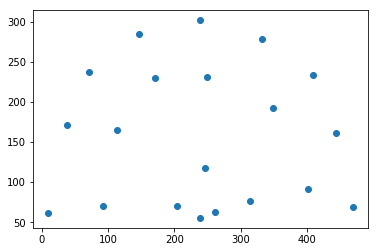

In [156]:
plt.scatter(centroids[:,0],centroids[:,1], label='True Position')  

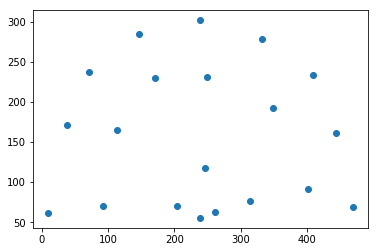

In [157]:
plt.scatter(centroids2[:,0],centroids2[:,1], label='True Position')  

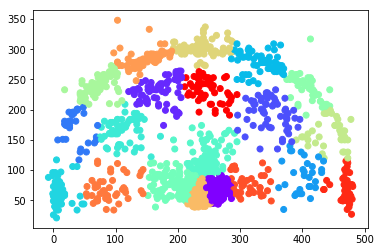

In [158]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  

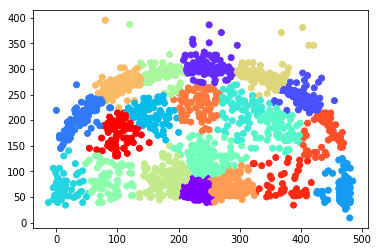

In [159]:
plt.scatter(X2[:,0],X2[:,1], c=kmeans2.labels_, cmap='rainbow')  